# PUI midterm

## Part 1: Multiple choice and theoretic questions (20 pts total, 5 pts each question)
Please write your answer after each question

### Question 1. What would the p-value of 0.04 mean for t-test comparing two samples of observations (select all that applies):
A) sample averages are at least 4% different

B) sample averages are the same

C) sample averages are different

D) one can reject the null hypothesis that the samples follows the underlying distributions with the same mean at 5% significance level (or with 95% confidence) since p-values is below 0.05

E) one can't reject the null hypothesis that the samples follows the underlying distributions with the same mean at 5% significance level (or 95% confidence) singe p-value does not reach 0.05

F) one can reject the null hypothesis that the samples follows the underlying distributions with the different means at 5% significance level (or 95% confidence)

G) probability that two samples have the same means is 4%

CD

### Question 2. What is true regarding normal and log-normal distributions:
A) Quantities following log-normal distributions have higher probabilities for outliers compared to normal distributions

B) Outliers significantly different from the mean are more common for the normally distributed variables compared to log normally distributed variables

C) Logarithm of the normally distributed quantity follow a log-normal distribution

D) Logarithm of the log-normally distributed quantity follows a normal distribution

E) Probability density function of the log-normally distributed variable equals to the logarithm of the probability density function of the normally distributed variable

AD

### Question 3. 
Imagine training a model which considers multiple sattelite images of urban traffic and tries to find groups of typical
(repeated with minor deviations) scenarios. How would you classify this problem from Machine Learning perspective?

A) Supervised leanring;

B) Unsupervised learning;

C) Semi-supervised learning;

D) Reinforcement learning.

Explain you choice:

B

### Question 4. 
Please explain why would you need separate training, validation and test samples to learn the model. In which cases you may need all three, including a validation sample?

#### Explaination of three sets
- Training set: is used for fit the model
- Test set: is used for evaluate the trained model performance
- Validation Set: is used for model selection. In machine learning, validation set used for generalize the model by avoid the effect the hyperparameters selection

#### Reason why seperate data
One of the model performance parameter is Generalization, witch is the ability to perform a task on new data. If we use the same dataset for training and testing, there is a great possible that the model will be overfit. Actually, the reason we create a model is because we want to use the model for classification or regression. Both of them require the model could be applied in other datasets. To predict the preformance when we use the model in other dataset, we created Generalization Error (Out of Sample Error). Seperating the dataset to train, test and validation set is to get lower generalization error.
#### A case need 3 sets
In machine learning, except the parameter related to the model, there are some hyperparameters we need to set before running the model. For example, batch size and number of hidden layer in Nerual Network, C and Sigma in support vector machine, K in K-means, etc. we use validation set for model selection to reduce the generalization error.
More detailed example:
when we trainning a regression dataset, we need to design a model. The model could be linear, 2 degree, 3 degree...... So how to determine the degree of model? if we use the test set or train set to evaluate the result of different degree, we will 'leak' the dataset to the model. Validation set can help help us do this type of work because it is seperated. 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
from scipy.stats import norm
from scipy.stats import genextreme as gev
from scipy.stats import pareto 
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



## Part 2: NYPD data analysis (80 pts)

In this part, you'll use New York Police Department (NYPD) complaints data for 2019 and write code for three following sections (each having own sub-sections): Data cleaning, Exploratory analysis and Hypothesis testing

### read data

In [2]:
data = pd.read_csv('Data/NYPD_data.csv')
data.head(2)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118.0,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113.0,FORGERY,729.0,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E


data.shape

data.OFNS_DESC.unique()

data.columns

The complete data dictionary link is provided above. The focus of this notebook would be on columns - 'CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'PARKS_NM', 'Latitude', 'Longitude'.

The 'CMPLNT_NUM' is a unique id for each complaint, 'CMPLNT_FR_DT' and 'CMPLNT_FR_TM' are date and time of complaint respectively, 'OFNS_DESC' is the type of offence reported, 'BORO_NM' is name of borough where complaint was reported, 'PARKS_NM' is name of park where complaint recorded (if any) and 'Latitude', 'Longitude' are location of complaint.


## Section 1 - Data cleaning tasks (12 pts, 3 pts each part)
1. Drop rows with a) missing/wrong complaint date and time b) missing borough name and c) duplicate complaint number ('CMPLNT_NUM' column)
2. Filter out data where incident occured in a park or greenspace. Next, keep data for 2019 and after.
3. Keep specific crime categories - type 1 crimes defined by FBI: The list is given here https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions
4. Filter by area (drop rows with location outside NYC)

### 1. filter out missing/wrong date and times, missing borough name and duplicate complaints from the data

In [3]:
# datatime
data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], errors='coerce')
data.shape

(653075, 35)

In [4]:
data.drop_duplicates(subset=['CMPLNT_NUM'], inplace=True)
data.dropna(subset=['CMPLNT_FR_DT', 'BORO_NM'], inplace = True)
print('after drop shape:', data.shape)

after drop shape: (651981, 35)


### 2. Remove rows where location is parks or greenspace and keep data for 2019 and after

In [5]:
# parks name is in 'PARKS_NM' column. If a crime has occured outside a parkspace, this value would be NaN
data['PARKS_NM'] = data['PARKS_NM'].astype(str)
data = data[data['PARKS_NM']=='nan']
data.shape

(646839, 35)

In [6]:
## check the timeline of data
data['CMPLNT_FR_DT'].dt.year.describe()

count    646839.000000
mean       2017.555740
std           2.546697
min        1911.000000
25%        2016.000000
50%        2019.000000
75%        2019.000000
max        2020.000000
Name: CMPLNT_FR_DT, dtype: float64

In [7]:
# remove data <2019
data = data[data['CMPLNT_FR_DT'].dt.year >= 2019]
data.shape

(446834, 35)

### 3. keep type 1 crimes as defined by FBI from the data : 
https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions

The crime type is present in the 'OFNS_DESC' column. You just need to keep the following categories: "'ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE',
                'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY'"

In [8]:
# code here
type1_crime_filter = data['OFNS_DESC'].isin(['ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE',
                'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY'])
data = data[type1_crime_filter]
data.shape

(91527, 35)

### 4. keep rows with location within NYC

zip codes file is present in the github 'Data' repository as "ZIPCODE.zip". You can also download the shapefile here: https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u/data?no_mobile=true .

Do a spatial joint to keep only rows within NYC

In [9]:
## zip codes map
zips = gpd.read_file('Data/ZIP_CODE/ZIP_CODE_040114.shp')
zips["COUNTY"].replace({
    "Bronx": "BRONX",
    "Queens": "QUEENS",
    "New York": "MANHATTAN",
    "Kings": "BROOKLYN", 
    "Richmond": "STATEN ISLAND"
}, inplace=True)
zips.to_crs(epsg=4326, inplace=True)
zips.shape

(263, 13)

In [10]:
data = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))
data.set_crs(epsg=4326, inplace=True)
data_copy = data[['CMPLNT_NUM', 'geometry']]
data.shape

(91527, 36)

In [11]:
data = gpd.sjoin(data, zips)
data.drop_duplicates(subset=['CMPLNT_NUM'], inplace=True)
data.shape

(91510, 49)

In [12]:
# Duplicate ZIPCODE would effect calulating population
zips.drop_duplicates(subset=['ZIPCODE'], inplace=True)
zips.shape

(248, 13)

<AxesSubplot:>

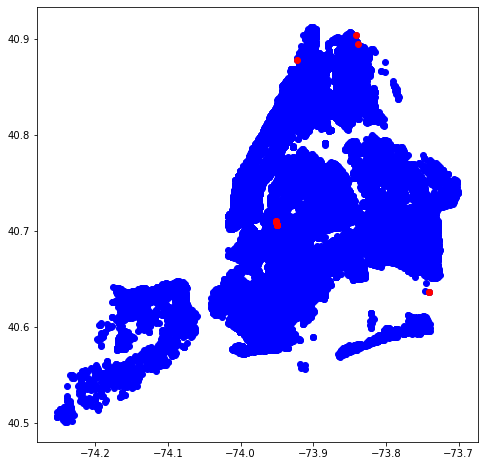

In [13]:
# check out of NYC point
original_point = list(data_copy['CMPLNT_NUM'].unique())
after_join_point = list(data['CMPLNT_NUM'].unique())
out_of_NYC_point = set(original_point).difference(set(after_join_point))
len(original_point)
fig,ax = plt.subplots(figsize=(8,8))
data_copy.plot(c='b', ax=ax)
data_copy[data_copy['CMPLNT_NUM'].isin(out_of_NYC_point)].plot(c='r', ax=ax)

## Section 2 -Exploratory analysis tasks (50 pts, 10 pts each part)

1. Visualize the time series of the total number of type 1 crimes for the whole city per day.
2. Visualize part 1 crimes grouped on a) borough level as a bar plot and b) zip code level as a heatmap normalized by population (per 100,000). Use quantiles scheme colormap.
3. Plot following bar plots: the total number of part 1 crimes by a) month, b) day of week( use weekday names for labels) and c) hour of day.
4. Plot two bar plots: Day of the week and hour of the day timelines for felony vs grand larceny (normalized per 100,000 population, comparing these two types of crime on the same bar plots)
5. Compare the %% decomposition of type 1 crimes by category of crime within different boroughs by plotting pie charts for each borough

### 1. time series plotting

In [14]:
# group total crimes by daily numbers
data = data[data['CMPLNT_FR_DT'].dt.year==2019]
crime_per_day = data[['CMPLNT_NUM', 'CMPLNT_FR_DT']].groupby(by='CMPLNT_FR_DT').count()
crime_per_day.rename(columns={'CMPLNT_NUM':'N_CMPLNT'}, inplace=True)
crime_per_day.head(2)

,N_CMPLNT
CMPLNT_FR_DT,
2019-01-01,313
2019-01-02,202


<AxesSubplot:xlabel='CMPLNT_FR_DT'>

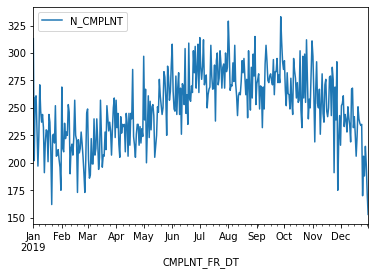

In [15]:
# plot
crime_per_day.plot()

### 2. plotting on borough and zip code level normalized by population

In [16]:
# group crime numbers by borough and normalize by their population (per 100,000). Population is given in the zips shapefile
boro_pop = zips[['COUNTY','POPULATION']].groupby('COUNTY').sum()
crime_per_boro = data[['BORO_NM', 'CMPLNT_NUM']].groupby('BORO_NM', as_index=False).count()
crime_per_boro = crime_per_boro.merge(boro_pop, left_on='BORO_NM', right_on='COUNTY')
crime_per_boro.rename(columns={'CMPLNT_NUM':'N_CMPLNT'}, inplace=True)
crime_per_boro['crimeDensity'] = 100000 * crime_per_boro['N_CMPLNT'] / crime_per_boro['POPULATION']
crime_per_boro

,BORO_NM,N_CMPLNT,POPULATION,crimeDensity
0,BRONX,18886,1381834.0,1366.734354
1,BROOKLYN,26274,2504700.0,1048.987903
2,MANHATTAN,25856,1575335.0,1641.301691
3,QUEENS,18140,2240517.0,809.634562
4,STATEN ISLAND,2308,468220.0,492.930674


<BarContainer object of 5 artists>

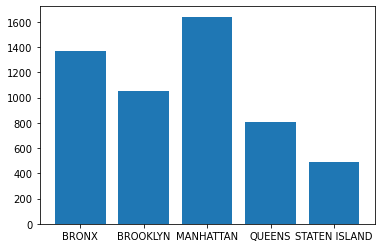

In [17]:
# plot as a bar plot
plt.bar(crime_per_boro.BORO_NM, crime_per_boro.crimeDensity)

In [18]:
# now group by zip codes, normalize by their population
zip_pop = zips[['ZIPCODE','POPULATION']].groupby('ZIPCODE', as_index=False).sum()
crime_per_zip = data[['ZIPCODE', 'CMPLNT_NUM']].groupby('ZIPCODE', as_index=False).count()
crime_per_zip.rename(columns={'CMPLNT_NUM':'N_CMPLNT'}, inplace=True)
crime_per_zip = crime_per_zip.merge(zip_pop, left_on='ZIPCODE', right_on='ZIPCODE')
crime_per_zip['crimeDensity'] = 100000 * crime_per_zip['N_CMPLNT'] / crime_per_zip['POPULATION']
crime_per_zip.head()

,ZIPCODE,N_CMPLNT,POPULATION,crimeDensity
0,00083,67,25.0,268000.000000
1,10001,1502,22413.0,6701.467898
2,10002,1221,81305.0,1501.752660
3,10003,1093,55878.0,1956.047103
4,10004,95,2187.0,4343.850023


<AxesSubplot:>

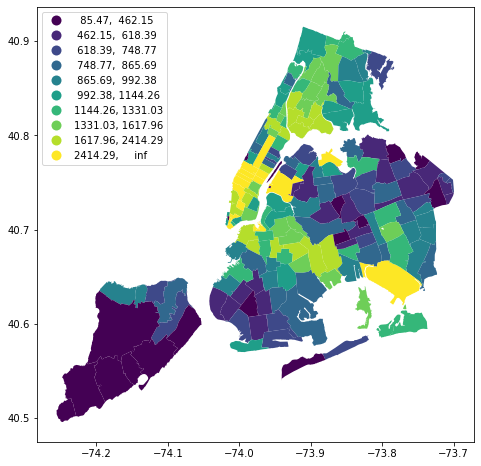

In [19]:
# plot as a heatmap with quantiles color scheme
crime_per_zip_viz = zips.merge(crime_per_zip, left_on='ZIPCODE', right_on='ZIPCODE')
fig, ax = plt.subplots(1, figsize=(8,8))
crime_per_zip_viz.plot(ax=ax, column='crimeDensity', k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})

### 3. bar plot of total crimes vs a) months b) day of week and c) hour of day

In [20]:
ext_data = data
ext_data['MONTH'] = ext_data['CMPLNT_FR_DT'].dt.month
ext_data['WEEK'] = ext_data['CMPLNT_FR_DT'].dt.dayofweek
ext_data['HOUR'] = pd.to_datetime(ext_data['CMPLNT_FR_TM']).dt.hour
ext_data.head(2)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,MONTH,WEEK,HOUR
5,293718737,2019-12-27,22:00:00,NaN,NaN,9.0,12/27/2019,107.0,BURGLARY,223.0,...,NY,MANHATTAN,36,061,http://www.usps.com/,0.0,0.0,12,4,22
227,259948697,2019-10-12,00:01:00,NaN,NaN,9.0,10/12/2019,109.0,GRAND LARCENY,443.0,...,NY,MANHATTAN,36,061,http://www.usps.com/,0.0,0.0,10,5,0


In [21]:
crime_per_month=ext_data[['MONTH', 'CMPLNT_NUM']].groupby('MONTH', as_index=False).count()
crime_per_week=ext_data[['WEEK', 'CMPLNT_NUM']].groupby('WEEK', as_index=False).count()
crime_per_hour=ext_data[['HOUR', 'CMPLNT_NUM']].groupby('HOUR', as_index=False).count()
crime_per_month.rename(columns={'CMPLNT_NUM':'N_CMPLNT'}, inplace=True)
crime_per_week.rename(columns={'CMPLNT_NUM':'N_CMPLNT'}, inplace=True)
crime_per_hour.rename(columns={'CMPLNT_NUM':'N_CMPLNT'}, inplace=True)

<BarContainer object of 12 artists>

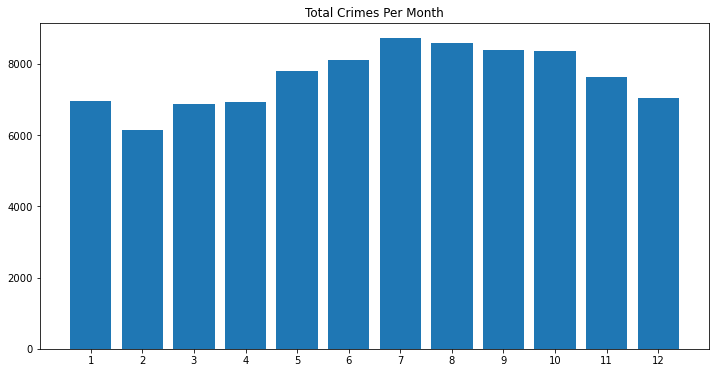

In [22]:
# Total Crimes Per Month
plt.figure(figsize=(12,6))
plt.xticks([month+1 for month in crime_per_month.index])
plt.title('Total Crimes Per Month')
plt.bar(crime_per_month.MONTH, crime_per_month.N_CMPLNT)

<BarContainer object of 7 artists>

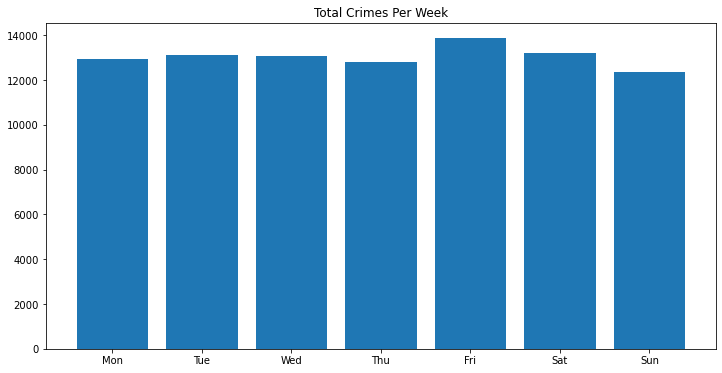

In [23]:
# Total Crimes Per WEEK
weekofday=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(12,6))
plt.xticks(crime_per_week.index, weekofday)
plt.title('Total Crimes Per Week')
plt.bar(crime_per_week.WEEK, crime_per_week.N_CMPLNT)

<BarContainer object of 24 artists>

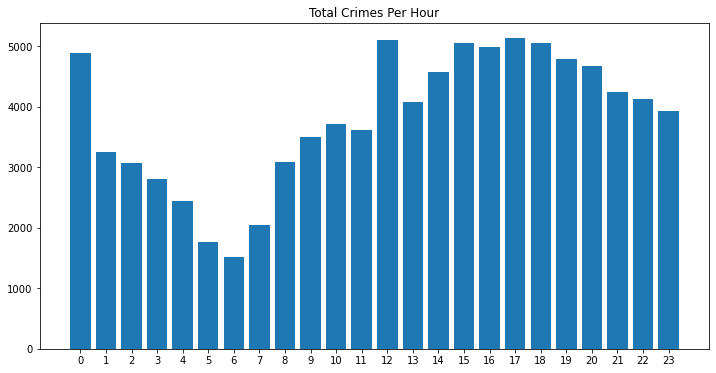

In [24]:
# Total Crimes Per Hour
plt.figure(figsize=(12,6))
plt.xticks(crime_per_hour.index)
plt.title('Total Crimes Per Hour')
plt.bar(crime_per_hour.HOUR, crime_per_hour.N_CMPLNT)

### 4. Felony assault vs grand larceny by a) day of week b) hour of day

In [25]:
# filter data for above crime types
crime_f_data = ext_data[ext_data['OFNS_DESC']=='FELONY ASSAULT']
crime_g_data = ext_data[ext_data['OFNS_DESC']=='GRAND LARCENY']

In [26]:
# group the numbers and normalize by total city population (per 100,000)
total_population = zips['POPULATION'].sum()
crime_f_per_week = crime_f_data[['WEEK', 'CMPLNT_NUM']].groupby('WEEK', as_index=False).agg({'CMPLNT_NUM':'count'})
crime_f_per_hour = crime_f_data[['HOUR', 'CMPLNT_NUM']].groupby('HOUR', as_index=False).agg({'CMPLNT_NUM':'count'})
crime_g_per_week = crime_g_data[['WEEK', 'CMPLNT_NUM']].groupby('WEEK', as_index=False).agg({'CMPLNT_NUM':'count'})
crime_g_per_hour = crime_g_data[['HOUR', 'CMPLNT_NUM']].groupby('HOUR', as_index=False).agg({'CMPLNT_NUM':'count'})
crime_f_per_week.rename(columns={'CMPLNT_NUM':'N_CMPLNT'}, inplace=True)
crime_f_per_hour.rename(columns={'CMPLNT_NUM':'N_CMPLNT'}, inplace=True)
crime_g_per_week.rename(columns={'CMPLNT_NUM':'N_CMPLNT'}, inplace=True)
crime_g_per_hour.rename(columns={'CMPLNT_NUM':'N_CMPLNT'}, inplace=True)
crime_f_per_week['crimeDensity'] = 100000 * crime_f_per_week['N_CMPLNT'] / total_population
crime_f_per_hour['crimeDensity'] = 100000 * crime_f_per_hour['N_CMPLNT'] / total_population
crime_g_per_week['crimeDensity'] = 100000 * crime_g_per_week['N_CMPLNT'] / total_population
crime_g_per_hour['crimeDensity'] = 100000 * crime_g_per_hour['N_CMPLNT'] / total_population
total_population

8170606.0

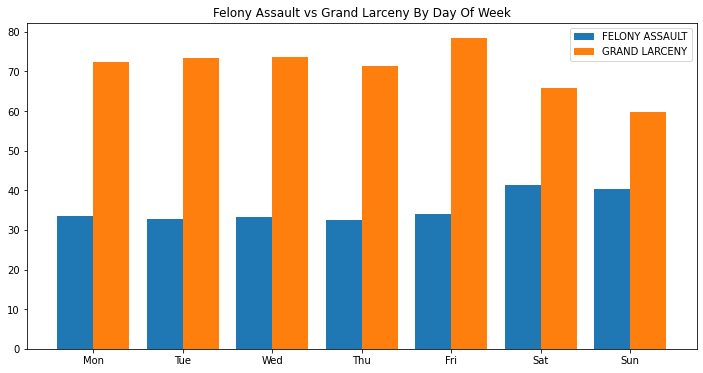

In [27]:
# plot two bar plots: one for day of week and other for hour of day
# each plot should have comparison of the two type of crime numbers (normalized) by weekday and hour respectively
barWidth = 0.4
weekIndex=np.arange(7)
weekofday=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(12,6))
plt.title('Felony Assault vs Grand Larceny By Day Of Week')
plt.bar(weekIndex-barWidth/2, crime_f_per_week.crimeDensity, width=barWidth, label="FELONY ASSAULT")
plt.bar(weekIndex+barWidth/2, crime_g_per_week.crimeDensity, width=barWidth, label="GRAND LARCENY")
plt.xticks(crime_f_per_week.index, weekofday)
plt.legend()
plt.show()

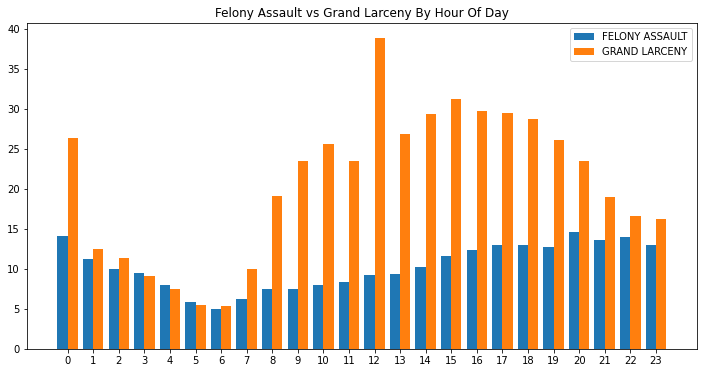

In [28]:
barWidth = 0.4
hourIndex=np.arange(24)
plt.figure(figsize=(12,6))
plt.title('Felony Assault vs Grand Larceny By Hour Of Day')
plt.bar(hourIndex-barWidth/2, crime_f_per_hour.crimeDensity, width=barWidth, label="FELONY ASSAULT")
plt.bar(hourIndex+barWidth/2, crime_g_per_hour.crimeDensity, width=barWidth, label="GRAND LARCENY")
plt.xticks(hourIndex)
plt.legend()
plt.show()

### 5. comparing the %% decomposition of crime within different boroughs

### % distribution of crime types by borough in pie charts 

for matplotlib pie charts documentation: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

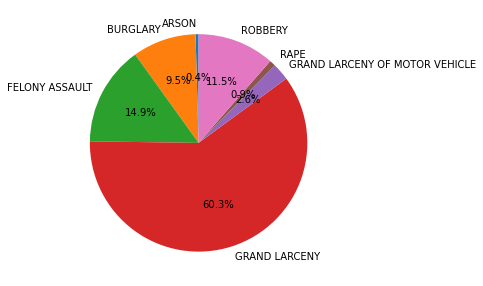

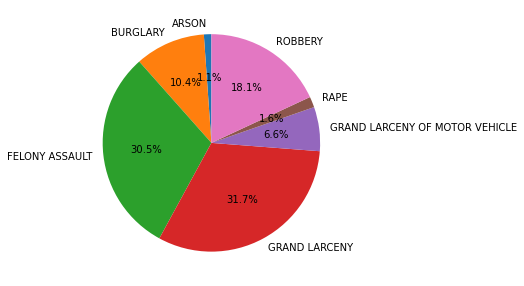

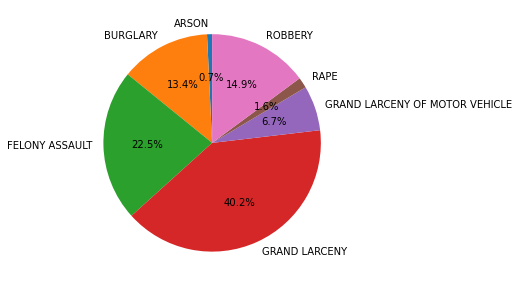

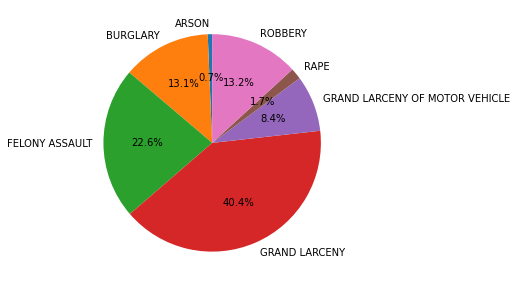

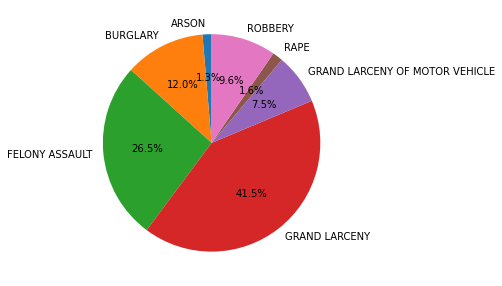

In [29]:
# plot 5 pie charts for each borough depicting % of each crime type within type 1 crimes
for i, boro in enumerate(data.BORO_NM.unique()):
    plt.figure(figsize=(5,5))
    data_t = data[data['BORO_NM']==boro]
    crime_per_type = data_t[['OFNS_DESC', 'CMPLNT_NUM']].groupby('OFNS_DESC', as_index=False).count()
    crime_per_type.rename(columns={'CMPLNT_NUM':'N_CMPLNT'}, inplace=True)
    plt.pie(crime_per_type.N_CMPLNT, labels=crime_per_type.OFNS_DESC, autopct='%1.1f%%',  startangle=90)

## Section 3 - Hypothesis testing tasks (18 pts, 9 pts for each part)

1. Plot the distribution (density plot) of daily number of total type 1 crimes for 2019.
Test the hypothesis if the distribution follows normal distribution.

2. Plot the distributions (density plots) of daily number of total type 1 crimes for weekdays and weekends (normalized by population) and perform a) the t-test for the hypothesis that the average daily crime over weekdays and weekends is the same, b) the KS-test for the hypothesis that the weekday and weekend daily crime numbers follow the same distribution. Can you reject either hypothesis at the 10% significance level? 

### 1. plotting distributions and normality test

In [30]:
#introduce a custom function performing distribution analysis
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles
    
    if log_scale: 
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale 
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x1,p))) #----------------------自行更改 x => x1
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
        bins=bins,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
        
    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)
    
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters
    
    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')
    plt.xlabel(xlabel) #add x label 
    plt.ylim(ylim) #restore the y-range of original distribution density values 
    plt.show()
    
    return pars

In [31]:
# group type 1 crime numbers per day for 2019
crime_per_day = data[['CMPLNT_FR_DT', 'CMPLNT_NUM']].groupby('CMPLNT_FR_DT').count()
crime_per_day.rename(columns={'CMPLNT_NUM':'N_CMPLNT'}, inplace=True)

Mean = 250.59
Standard deviation = 32.84
1 percentile = 172.64
5 percentile = 197.20
25 percentile = 227.00
50 percentile = 251.00
75 percentile = 275.00
95 percentile = 302.00
99 percentile = 313.36


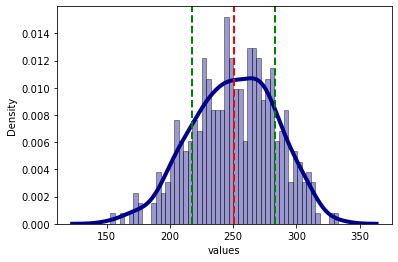

In [32]:
# plot the distribution (density plot)
distribution_analysis(crime_per_day.N_CMPLNT)

In [33]:
# normality test
def is_normal(x): #check is the distribution is normal using one-sample KS test and sample mean-std
    return stats.kstest(x,'norm',args=(x.mean(),x.std()))
is_normal(crime_per_day.N_CMPLNT)

KstestResult(statistic=0.047581917791931994, pvalue=0.3687953478777197)

### 2. weekdays vs weekend distribution

In [34]:
# create dataframes for weekdays and weekends
crime_weekends = data[(data['CMPLNT_FR_DT'].dt.dayofweek==5) | (data['CMPLNT_FR_DT'].dt.dayofweek==6)]
crime_weekdays = data[(data['CMPLNT_FR_DT'].dt.dayofweek!=5) & (data['CMPLNT_FR_DT'].dt.dayofweek!=6)]
print('crime_weekends.shape', crime_weekends.shape)
print('crime_weekdays.shape', crime_weekdays.shape)

crime_weekends.shape (25585, 52)
crime_weekdays.shape (65879, 52)


In [35]:
# group daily numbers for weekdays and weekends
total_population = zips['POPULATION'].sum()
crime_weekdays_per_day = crime_weekdays[['CMPLNT_FR_DT', 'CMPLNT_NUM']].groupby('CMPLNT_FR_DT').count()
crime_weekends_per_day = crime_weekends[['CMPLNT_FR_DT', 'CMPLNT_NUM']].groupby('CMPLNT_FR_DT').count()
crime_weekdays_per_day.rename(columns={'CMPLNT_NUM':'N_CMPLNT'}, inplace=True)
crime_weekends_per_day.rename(columns={'CMPLNT_NUM':'N_CMPLNT'}, inplace=True)
crime_weekdays_per_day['crimeDensity'] = 100000 * crime_weekdays_per_day['N_CMPLNT'] / total_population
crime_weekends_per_day['crimeDensity'] = 100000 * crime_weekends_per_day['N_CMPLNT'] / total_population
crime_weekdays_per_day.shape

(261, 2)

Mean = 3.09
Standard deviation = 0.41
1 percentile = 2.10
5 percentile = 2.44
25 percentile = 2.81
50 percentile = 3.10
75 percentile = 3.39
95 percentile = 3.70
99 percentile = 3.85


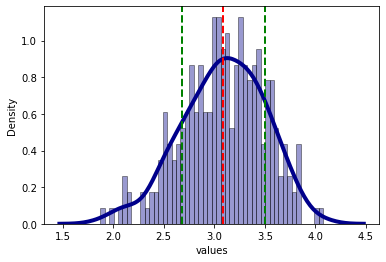

In [36]:
# weekdays plot distribution (density plot)
distribution_analysis(crime_weekdays_per_day.crimeDensity)

Mean = 3.01
Standard deviation = 0.38
1 percentile = 2.33
5 percentile = 2.41
25 percentile = 2.74
50 percentile = 2.97
75 percentile = 3.31
95 percentile = 3.66
99 percentile = 3.77


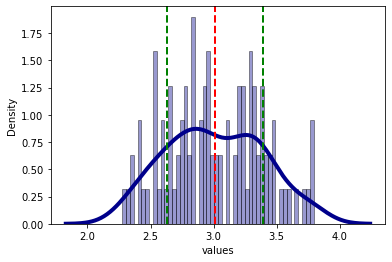

In [37]:
# weekends plot distribution (density plot)
distribution_analysis(crime_weekends_per_day.crimeDensity)

In [38]:
# t-test
t_res = stats.ttest_ind(crime_weekdays_per_day.crimeDensity,crime_weekends_per_day.crimeDensity)
print(t_res)
print("reject" if t_res[1] < 0.1 else "keep", f'the hypothesis at 90% significance level')


Ttest_indResult(statistic=1.685161104465405, pvalue=0.09281691456370822)
reject the hypothesis at 90% significance level


In [39]:
# k-s test
ks_res = stats.ks_2samp(crime_weekdays_per_day.crimeDensity,crime_weekends_per_day.crimeDensity)
print(ks_res)
print("reject" if ks_res[1] < 0.1 else "keep", f'the hypothesis at 90% significance level')

KstestResult(statistic=0.14968317123489538, pvalue=0.06303387257522763)
reject the hypothesis at 90% significance level
